## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

/bin/sh: 1: nvidia-smi: not found


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ['CUDA_VISIBLE_DEVICES'] = ''

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x,flatten = True):
    x = x/255.
    if flatten:
        x = x.reshape((len(x),-1))
    return x

def preproc_y(y,num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y,num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [31]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(input_layer)
        else :
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(x)
    out = keras.layers.Dense(units=10,activation='softmax',name='output')(x)
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:],num_neurons=[512,256,128,64,32,16])

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 16)                528 

In [32]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 256

In [33]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [34]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test),
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.0863 - accuracy: 0.2026 - val_loss: 1.9706 - val_accuracy: 0.2568
Epoch 2/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.8457 - accuracy: 0.3274 - val_loss: 1.7455 - val_accuracy: 0.3677
Epoch 3/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.7192 - accuracy: 0.3792 - val_loss: 1.6898 - val_accuracy: 0.3887
Epoch 4/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6384 - accuracy: 0.4119 - val_loss: 1.6256 - val_accuracy: 0.4150
Epoch 5/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.5883 - accuracy: 0.4306 - val_loss: 1.6591 - val_accuracy: 0.4119
Epoch 6/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.5396 - accuracy: 0.4506 - val_loss: 1.5454 - val_accuracy: 0.4511
Epoch 7/50
50000/50000 [==============================] - 3s 66us/st

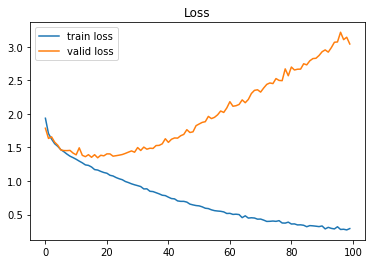

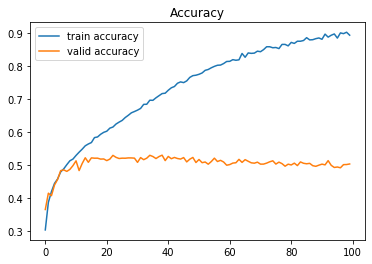

In [30]:
# #test 1 
# import matplotlib.pyplot as plt


# train_loss = model.history.history["loss"]
# valid_loss = model.history.history["val_loss"]

# train_acc = model.history.history["accuracy"]
# valid_acc = model.history.history["val_accuracy"]

# plt.plot(range(len(train_loss)), train_loss, label="train loss")
# plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
# plt.legend()
# plt.title("Loss")
# plt.show()

# plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
# plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
# plt.legend()
# plt.title("Accuracy")
# plt.show()



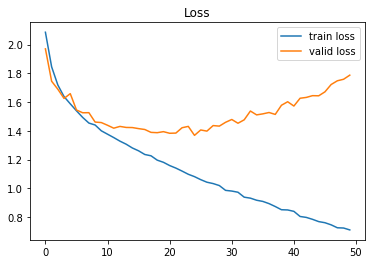

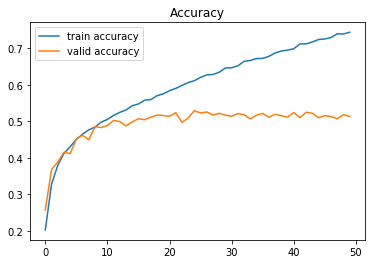

In [35]:
#test 2 
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

